# Written by Andrew Nell @andrewnell
# HW3 Assignment 2


In [48]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os


%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2017")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2017")

Populating the interactive namespace from numpy and matplotlib


In [49]:
#Define function for downloading file from internet and sending to PUIData
"""Function to download file from internet and save in PUIdata"""

def getbikedata(Datestr):
    
    os.system("curl -O https://s3.amazonaws.com/tripdata/" + Datestr + "-citibike-tripdata.zip")
    
    os.system("mv " + Datestr + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
    
    os.system("unzip " + os.getenv("PUIDATA") + "/" + Datestr + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA")) 

# IDEA:
## Subscribers are less likely to travel for more than 45 minutes than customers

# NULL HYPOTHESIS:
## The ratio of subscribers traveled over 45 minutes as a proportion of total subscribers travelled is the same as or greater than the ratio of customers who traveled over 45 minutes as a percentage of total customers travelled

# _$H_0$_ : $\frac{C_{\mathrm{Over 45}}}{C_{\mathrm{Total}}} <= \frac{S_{\mathrm{Over 45}}}{S_{\mathrm{Total}}}$
# _$H_1$_ : $\frac{C_{\mathrm{Over 45}}}{C_{\mathrm{total}}} > \frac{S_{\mathrm{Over 45}}}{S_{\mathrm{Total}}}$


## I will use a significance level  $\alpha=0.05$

#### which means I want the probability of getting a result at least as significant as mine to be less then 5%

In [50]:
# Import data for specific date
Datestr = "201612"
getbikedata(Datestr) #Move file 201612 into PUIdata

In [198]:
# Read data and move into dataframe
CitibikeData = pd.read_csv(os.getenv("PUIDATA") + "/" + Datestr + "-citibike-tripdata.csv")

# Add columns for over/under 45 minutes
CitibikeData['Over45'] = CitibikeData['Trip Duration']> 45*60
CitibikeData['Over45'] = CitibikeData['Over45'].astype(int)
CitibikeData['Over45'] = CitibikeData['Over45'].replace(0,"Under 45")
CitibikeData['Over45'] = CitibikeData['Over45'].replace(1,"Over 45")

CitibikeData.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Over45
0,528,2016-12-01 00:00:04,2016-12-01 00:08:52,499,Broadway & W 60 St,40.769155,-73.981918,228,E 48 St & 3 Ave,40.754601,-73.971879,26931,Subscriber,1964.0,1,Under 45
1,218,2016-12-01 00:00:28,2016-12-01 00:04:06,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,27122,Subscriber,1955.0,1,Under 45
2,399,2016-12-01 00:00:39,2016-12-01 00:07:19,297,E 15 St & 3 Ave,40.734232,-73.986923,345,W 13 St & 6 Ave,40.736494,-73.997044,19352,Subscriber,1985.0,1,Under 45
3,254,2016-12-01 00:00:44,2016-12-01 00:04:59,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,20015,Subscriber,1982.0,1,Under 45
4,1805,2016-12-01 00:00:54,2016-12-01 00:31:00,279,Peck Slip & Front St,40.707873,-74.001670,279,Peck Slip & Front St,40.707873,-74.001670,23148,Subscriber,1989.0,1,Under 45


In [199]:
# Drop Columns that are irrelevant
CitibikeData.drop(['Trip Duration','Start Time', 'Stop Time', 'Start Station ID',
                   'Start Station Name', 'Start Station Latitude',
                   'Start Station Longitude', 'End Station ID', 
                   'End Station Name','End Station Latitude', 
                   'End Station Longitude', 'Bike ID', 
                   'Birth Year', 'Gender'], 
                  axis=1, inplace=True)

CitibikeData.head(10)

,User Type,Over45
0,Subscriber,Under 45
1,Subscriber,Under 45
2,Subscriber,Under 45
3,Subscriber,Under 45
4,Subscriber,Under 45
5,Subscriber,Under 45
6,Subscriber,Under 45
7,Subscriber,Under 45
8,Customer,Under 45
9,Subscriber,Under 45


In [158]:
# Determine Total Customers and Subscribers to convert data to percentages
TotalCustomer = CitibikeData['User Type'][CitibikeData['User Type'] == 'Customer'].count()/100
TotalSubscriber = CitibikeData['User Type'][CitibikeData['User Type'] == 'Subscriber'].count()/100

# Group data into counts
CitiBikeSumm = CitibikeData.groupby('User Type')['Over45'].value_counts().unstack(level=-1).stack(dropna=False).reset_index(name="Count")

# Convert to percentages
CitiBikeSumm['Count'][CitiBikeSumm['User Type'] == 'Subscriber'] = CitiBikeSumm['Count'][CitiBikeSumm['User Type'] == 'Subscriber']/TotalSubscriber
CitiBikeSumm['Count'][CitiBikeSumm['User Type'] == 'Customer'] = CitiBikeSumm['Count'][CitiBikeSumm['User Type'] == 'Customer']/TotalCustomer

CitiBikeSumm

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,User Type,Over45,Count
0,Customer,Over 45,9.327922
1,Customer,Under 45,90.672078
2,Subscriber,Over 45,0.486647
3,Subscriber,Under 45,99.513353


([<matplotlib.axis.XTick at 0x7f93aa7473d0>,
 <a list of 2 Text xticklabel objects>)

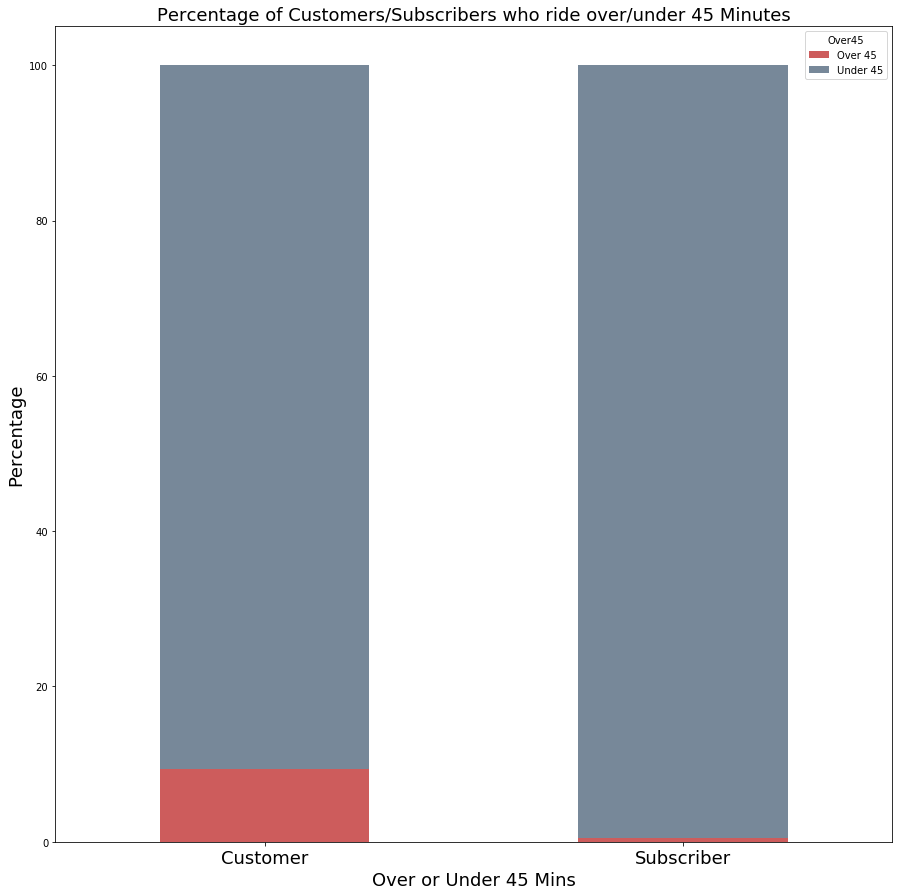

In [197]:
# Plot Graph
fig = pl.figure(figsize(15,15))
CitiBikeSumm.pivot(index='User Type', columns='Over45', 
                   values='Count').plot(kind="bar",stacked=True, 
                                        color=['IndianRed','lightslategrey'])

# Format graph
pl.title('Percentage of Customers/Subscribers who ride over/under 45 Minutes', 
         fontsize = 18)
pl.xlabel('Over or Under 45 Mins', fontsize = 18)
pl.ylabel('Percentage', fontsize = 18)
pl.xticks([0,1],["Customer","Subscriber"], fontsize = 18,rotation='horizontal')



## Figure 1: Percentage Customers and Subscribers who ride over/under 45 minutes when they use the bikes
### Note That almost no subscribers travel for further than 45 minutes